# Natural Language Processing

# Sentiment Analysiz and Sentiment Modeling

## About Dataset:

#### This dataset contains conversations between users and experienced psychologists related to mental health topics. Carefully collected and anonymized, the data can be used to further the development of Natural Language Processing (NLP) models which focus on providing mental health advice and guidance. It consists of a variety of questions which will help train NLP models to provide users with appropriate advice in response to their queries.


#### This dataset contains conversations between users and experienced psychologists about important mental health topics

#### Context: The conversation between the user and the psychologist. (Text)
#### Response: The response from the psychologist to the user. (Text)

# import packages

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)


!pip install nltk
!pip install textblob
!pip install wordcloud

from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/sample_data/train.csv")
df.shape

(3512, 2)

In [ ]:
df.head()

,Context,Response
0,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today."
1,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone. Changing our feelings is like changing our thoughts - it's hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it's place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to ""snap out of it"" - which is also a thought that carries some self-criticism. Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the thoughts, you change how you respond to them. You learn skills that allow you to manage difficult thoughts and feelings differently so they don't have the same impact on you that they do right now. For some people, they actually DO begin to experience less hurtful thoughts once they learn how to manage the ones they have differently. Acceptance and Commitment Therapy may be a good choice for you. There is information online and even self-help books that you can use to teach you the skills that I mentioned. Because they are skills, they require practice, but many people have found great relief and an enriched life by learning them. As for suicidal thoughts, I am very glad to read that this has not happened to you. Still, you should watch out for this because it can be a sign of a worsening depression. If you begin to think about this, it is important to reach out to a support system right away. The National Suicide Prevention Lifeline is 1-800-273-8255. The text line is #741741. I hope some other colleagues will provide you more suggestions. Be well...Robin Landwehr, DBH, LPCC"
2,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How

In [ ]:
# random responce:

random_response = df["Response"][1:2]
print("before text preprocessing len: ", len(df["Response"][1]))

before text preprocessing len:  2082


# Text Preprocessing

In [ ]:
# Normalizing Case Folding

df["Context"] = df["Context"].str.lower()
df["Response"] = df["Response"].str.lower()

In [ ]:
# Remove Punctuations

df["Context"] = df["Context"].str.replace('[^\w\s]', '')
df["Response"] = df["Response"].str.replace('[^\w\s]', '')

In [ ]:
# Remove Numbers

df["Context"] = df["Context"].str.replace('\d', '')
df["Response"] = df["Response"].str.replace('\d', '')

In [ ]:
# Remove Stopwords (a, an, and, as, at, but, by, for, if, is, it, on, of, or, s, that, their, the, then, these ...)
import nltk
nltk.download('stopwords')

sw = stopwords.words('english')

df["Context"] = df["Context"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["Response"] = df["Response"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# let' s check random response:

print("after text preprocessing len: ",len(df["Response"][1]))

after text preprocessing len:  1300


In [ ]:
# Remove Rarewords:

# Let's remove words used less than 1
temp_Context = pd.Series(' '.join(df['Context']).split()).value_counts()
drops = temp_Context[temp_Context <= 1]
df['Context'] = df['Context'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

temp_Response = pd.Series(' '.join(df['Response']).split()).value_counts()
drops = temp_Response[temp_Response <= 1]
df['Response'] = df['Response'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [ ]:
# Tokenization
nltk.download('punkt_tab')
df["Context"].apply(lambda x: TextBlob(x).words).head(1)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Context
0,"[going, things, feelings, myself, barely, sleep, nothing, think, worthless, here, never, tried, contemplated, suicide, always, wanted, fix, issues, never, get, around, it, change, feeling, worthless, everyone]"


In [ ]:
# Lemmatization
nltk.download('wordnet')
df["Context"] = df["Context"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["Response"] = df["Response"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# let' s check random response:

print("after tokenizateion and lemmatization len: ",len(df["Response"][1]))

after tokenizateion and lemmatization len:  1200


# Text Visualization

In [ ]:
# Calculating term frequencies:

tf_Context = df["Context"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_Context.columns = ["words", "tf"]
tf_Context.sort_values("tf", ascending=False)

,words,tf
66,feel,1315.00
67,like,1145.00
61,know,989.00
18,get,985.00
140,want,932.00
...,...,...
3154,unwilling,2.00
3153,nightmare.,2.00
3152,"having,",2.00
3151,fantasy,2.00


In [ ]:
# Calculating term frequencies:

tf_Response = df["Response"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_Response.columns = ["words", "tf"]
tf_Response.sort_values("tf", ascending=False)

,words,tf
48,may,2890.00
10,feel,2877.00
362,would,2343.00
113,help,2194.00
76,like,2155.00
...,...,...
11961,"broth,",2.00
11960,flu),2.00
11959,mood).,2.00
11958,vigorous,2.00


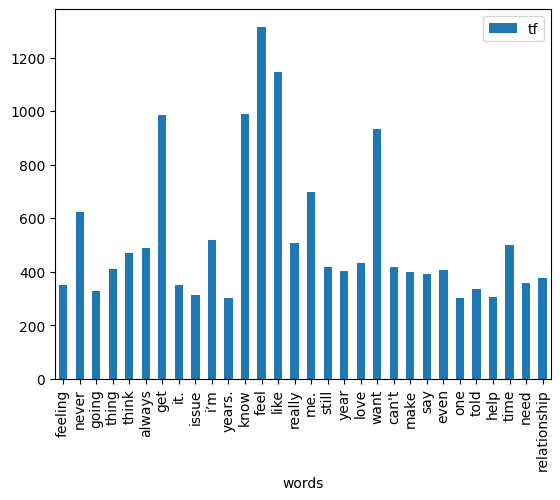

In [ ]:
# Barplot for Context

tf_Context[tf_Context["tf"] > 300].plot.bar(x="words", y="tf")
plt.show()

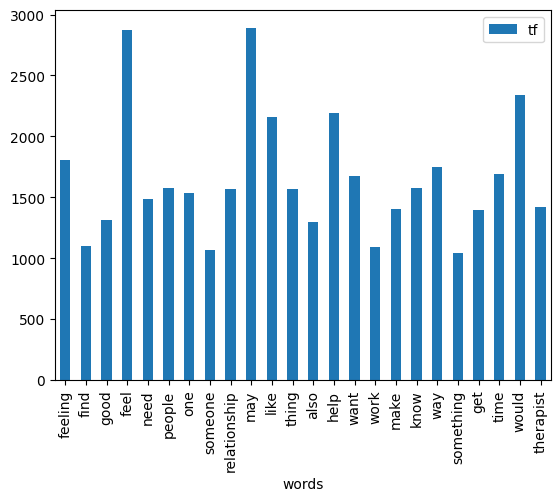

In [ ]:
# Barplot for Response

tf_Response[tf_Response["tf"] > 1000].plot.bar(x="words", y="tf")
plt.show()

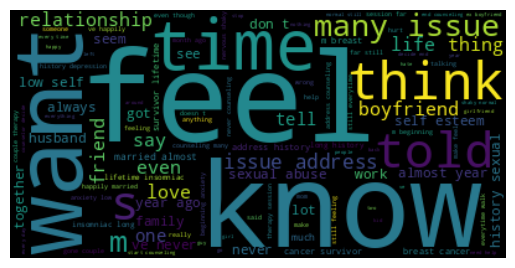

In [ ]:
# Wordcloud for Context

text_Context = " ".join(i for i in df.Context)

wordcloud = WordCloud().generate(text_Context)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

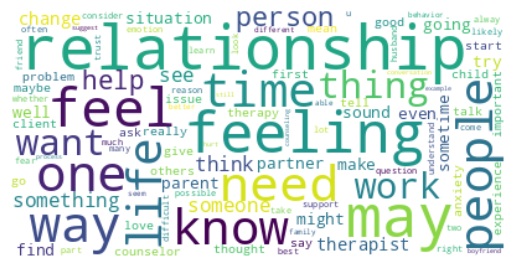

In [ ]:
# Wordcloud for Response

text_Response = " ".join(i for i in df.Response)

wordcloud_Response = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text_Response)
plt.figure()
plt.imshow(wordcloud_Response, interpolation="bilinear")
plt.axis("off")
plt.show()

# wordcloud.to_file("wordcloud.png") # kaydetmek istersek

# Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer() #nltk library

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df["polarity_score_Context"] = df["Context"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_score_Context"]

,polarity_score_Context
0,0.86
1,0.86
2,0.86
3,0.86
4,0.86
...,...
3507,-0.49
3508,-0.38
3509,-0.92
3510,-0.62


In [ ]:
df["polarity_score_Response"] = df["Response"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_score_Response"]

,polarity_score_Response
0,0.88
1,0.97
2,0.80
3,0.25
4,0.46
...,...
3507,-0.80
3508,-0.78
3509,0.98
3510,0.87


# Feature Engineering

In [ ]:
df["sentiment_label_Context"] = df["Context"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")


In [ ]:
df["sentiment_label_Context"].value_counts()

,count
sentiment_label_Context,
neg,2323
pos,1189


In [ ]:
df["sentiment_label_Response"] = df["Response"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df.columns

Index(['Context', 'Response', 'polarity_score_Context', 'polarity_score_Response', 'sentiment_label_Context', 'sentiment_label_Response'], dtype='object')

In [ ]:
df[['polarity_score_Context', 'polarity_score_Response',
    'sentiment_label_Context', 'sentiment_label_Response']]

,polarity_score_Context,polarity_score_Response,sentiment_label_Context,sentiment_label_Response
0,0.86,0.88,pos,pos
1,0.86,0.97,pos,pos
2,0.86,0.80,pos,pos
3,0.86,0.25,pos,pos
4,0.86,0.46,pos,pos
...,...,...,...,...
3507,-0.49,-0.80,neg,neg
3508,-0.38,-0.78,neg,neg
3509,-0.92,0.98,neg,pos
3510,-0.62,0.87,neg,pos


In [ ]:
df["sentiment_label_Response"].value_counts()

,count
sentiment_label_Response,
1,2889
0,623


In [ ]:
df.head()

,Context,Response,polarity_score_Context,polarity_score_Response,sentiment_label_Context,sentiment_label_Response
0,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?","everyone think worthless, maybe need find new people hang social context person life big influence go round round trying understand worthless, go back crowd many inspirational message find social media. maybe read one state person worthless, everyone good purpose life.also, since culture saturated belief someone feel good somehow feeling part living. motivation remove situation relationship u harm feeling feel feeling worthlessness may good sense motivating find much better feeling today.",0.86,0.88,pos,pos
1,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?","hello, thank question seeking advice this. feeling worthlessness unfortunately common. fact, people, all, felt degree point life. alone. changing feeling like changing thought - hard do. mind amazing minute change thought another one right take place. without another thought pop there. new thought may feel worse last one! guess tried several thing improve even reaching here. people often try thinking positive thoughts, thoughts, simply telling need it"" - also thought carry people try different approach, counselor help this. idea instead trying change thoughts, change respond them. learn skill allow manage difficult thought feeling differently impact right now. people, actually begin experience less hurtful thought learn manage one differently. acceptance commitment therapy may good choice you. information online even self-help book use teach skill mentioned. skills, require practice, many people found great relief life learning them. suicidal thoughts, glad read happened you. still, watch sign depression. begin think this, important reach support system right away. national suicide prevention lifeline 1-800-273-8255. text line hope colleague provide suggestions. landwehr, dbh, lpcc",0.86,0.97,pos,pos
2,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?",first thing suggest getting sleep need impact think feel. look finding going well life grateful for. believe everyone want find purpose life. think figure help.,0.86,0.80,pos,pos
3,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?","therapy essential feeling depressed worthless. work experiencing concern related feeling depression issue self esteem. generally work client help build coping skill reduce level depression assist strengthening self esteem, guiding client cbt practices. cbt help gaining better awareness thought process influence belief system, belief impact action outcome behaviors. process isn’t easy help teach individual don’t always control happens life control feel, behave. cbt good individual dealing depression, anxiety, toxic relationships, stress, self esteem, etc.",0.86,0.25,pos,pos
4,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?",first want let know alone feeling always someone help. always change feeling change way thinking open trying change. always make available learning new thing volunteering make purpose yourself.,0.86,0.46,pos,pos


# Emotional Analysis

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from transformers import pipeline

# Load the emotion detection pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Function to detect emotions in a text
def detect_emotion(text):
    try:
        results = classifier(text)[0]  # Assuming single text input
        # Extract emotion labels and scores
        emotions = {}
        for result in results:
            emotions[result['label']] = result['score']
        return emotions
    except Exception as e:
        print(f"Error processing text: {e}")
        return {}  # Or handle the error in a different way


# Apply emotion detection to each context
df['emotion_scores'] = df['Context'].apply(detect_emotion)

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# ใช้ CountVectorizer เพื่อแปลงข้อความเป็น matrix ของคำ
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Context'])

# ใช้ LDA เพื่อทำ topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# แสดงคำสำคัญสำหรับแต่ละหัวข้อ
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([terms[i] for i in topic.argsort()[:-11:-1]])

Topic #1:
['counseling', 've', 'issue', 'people', 'history', 'years', 'address', 'married', 'feel', 'anxiety']
Topic #2:
['feel', 'like', 'want', 'know', 'time', 'relationship', 'say', 'need', 'talk', 'love']
Topic #3:
['know', 'like', 'think', 'therapist', 'afraid', 'say', 'normal', 'therapy', 'love', 'want']
Topic #4:
['want', 'feel', 'love', 'like', 'think', 'know', 'year', 'friend', 'school', 'told']
Topic #5:
['time', 'boyfriend', 'want', 'thing', 'lot', 'like', 'year', 'relationship', 'work', 'really']


In [ ]:
# Function to get the emotion with the highest score
def get_max_emotion(emotion_scores):
    if emotion_scores:
        return max(emotion_scores, key=emotion_scores.get)
    else:
        return None

# Apply the function to get the emotion with the highest score for each row
df['max_emotion'] = df['emotion_scores'].apply(get_max_emotion)

# Display the results
#for index, row in df.iterrows():
#    print(f"Row {index}: {row['max_emotion']}")
df.head()

,Context,Response,polarity_score_Context,polarity_score_Response,sentiment_label_Context,sentiment_label_Response,emotion_scores,max_emotion
0,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?","everyone think worthless, maybe need find new people hang social context person life big influence go round round trying understand worthless, go back crowd many inspirational message find social media. maybe read one state person worthless, everyone good purpose life.also, since culture saturated belief someone feel good somehow feeling part living. motivation remove situation relationship u harm feeling feel feeling worthlessness may good sense motivating find much better feeling today.",0.86,0.88,pos,pos,"{'anger': 0.0012688260758295655, 'disgust': 0.0007643284625373781, 'fear': 0.00045276692253537476, 'joy': 0.0011850378941744566, 'neutral': 0.0021746226120740175, 'sadness': 0.9927994012832642, 'surprise': 0.001355016604065895}",sadness
1,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?","hello, thank question seeking advice this. feeling worthlessness unfortunately common. fact, people, all, felt degree point life. alone. changing feeling like changing thought - hard do. mind amazing minute change thought another one right take place. without another thought pop there. new thought may feel worse last one! guess tried several thing improve even reaching here. people often try thinking positive thoughts, thoughts, simply telling need it"" - also thought carry people try different approach, counselor help this. idea instead trying change thoughts, change respond them. learn skill allow manage difficult thought feeling differently impact right now. people, actually begin experience less hurtful thought learn manage one differently. acceptance commitment therapy may good choice you. information online even self-help book use teach skill mentioned. skills, require practice, many people found great relief life learning them. suicidal thoughts, glad read happened you. still, watch sign depression. begin think this, important reach support system right away. national suicide prevention lifeline 1-800-273-8255. text line hope colleague provide suggestions. landwehr, dbh, lpcc",0.86,0.97,pos,pos,"{'anger': 0.0012688260758295655, 'disgust': 0.0007643284625373781, 'fear': 0.00045276692253537476, 'joy': 0.0011850378941744566, 'neutral': 0.0021746226120740175, 'sadness': 0.9927994012832642, 'surprise': 0.001355016604065895}",sadness
2,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?",first thing suggest getting sleep need impact think feel. look finding going well life grateful for. believe everyone want find purpose life. think figure help.,0.86,0.80,pos,pos,"{'anger': 0.0012688260758295655, 'disgust': 0.0007643284625373781, 'fear': 0.00045276692253537476, 'joy': 0.0011850378941744566, 'neutral': 0.0021746226120740175, 'sadness': 0.9927994012832642, 'surprise': 0.001355016604065895}",sadness
3,"going thing feeling myself. barely sleep nothing think worthless here. never tried contemplated suicide. always wanted fix issues, never get around it. change feeling worthless everyone?","therapy essential feeling depressed worthless. work experiencing concern related feeling depression issue self esteem. generally work client help build coping skill reduce level depression assist strengthening self esteem, guiding client cbt practices. cbt help gaining better awareness thought process influence belief system, belief impact action outcome behaviors. process isn’t easy help teach individual don’t always control happens life control feel, behave. 

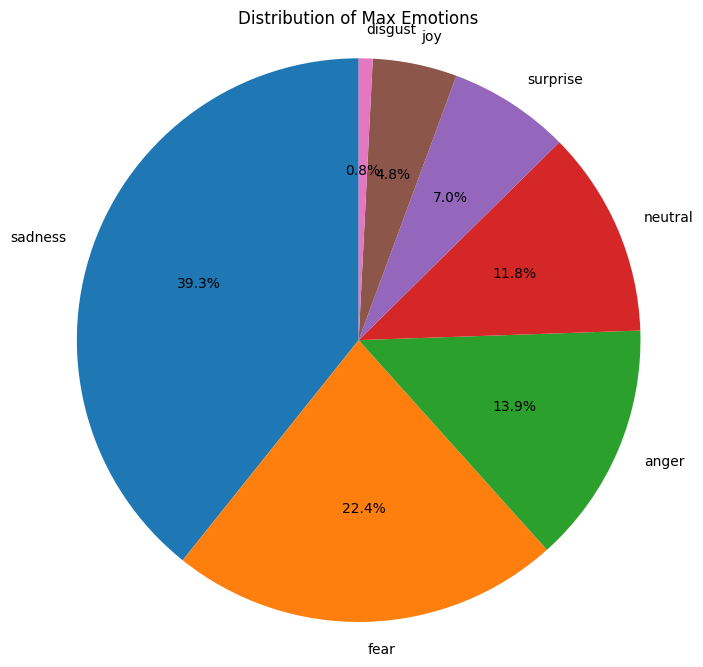

In [ ]:
# prompt: pie visualization max_emotion

import matplotlib.pyplot as plt

# Count the occurrences of each emotion
emotion_counts = df['max_emotion'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Max Emotions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


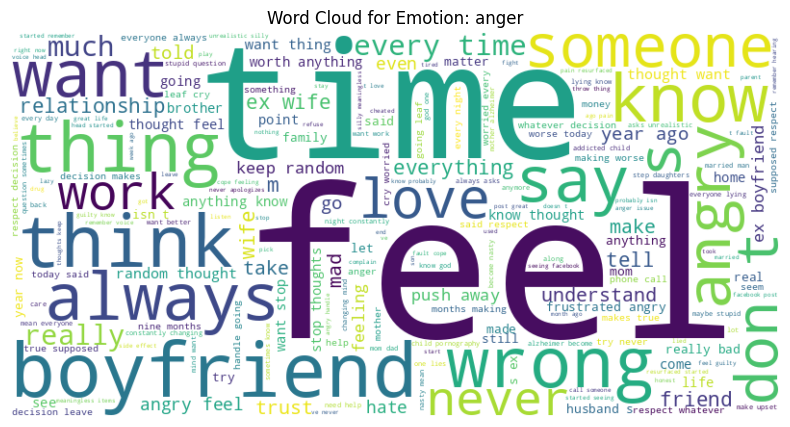

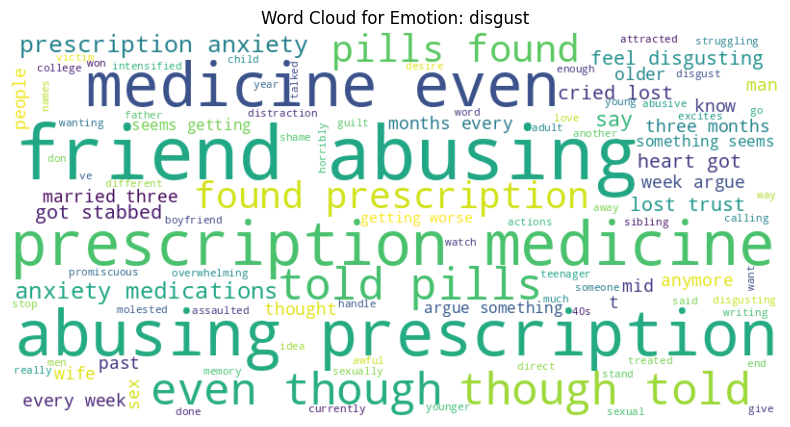

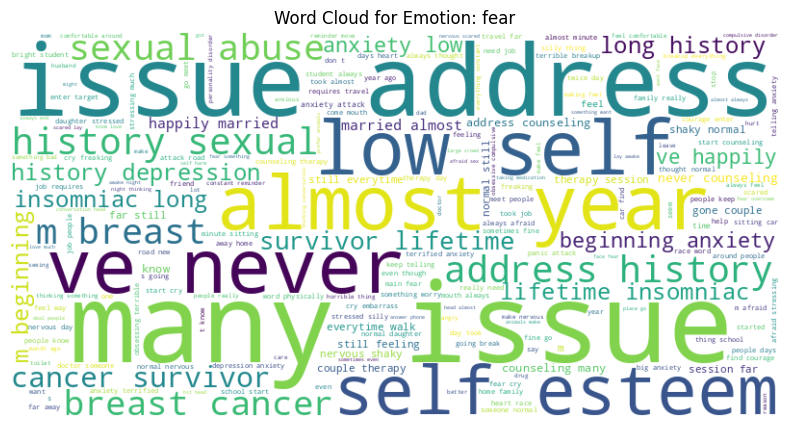

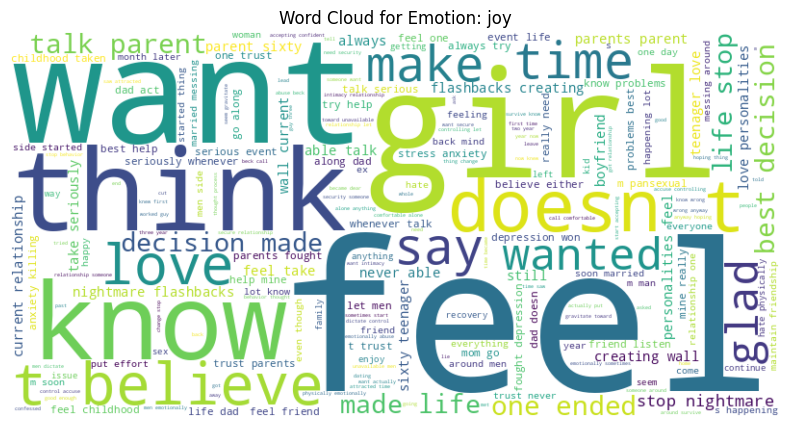

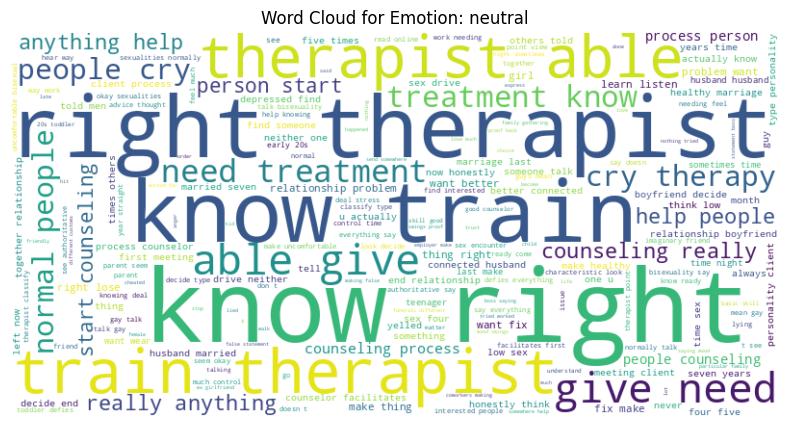

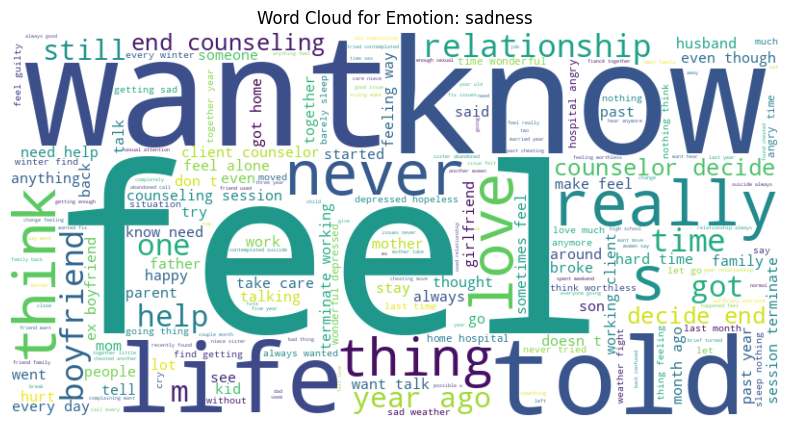

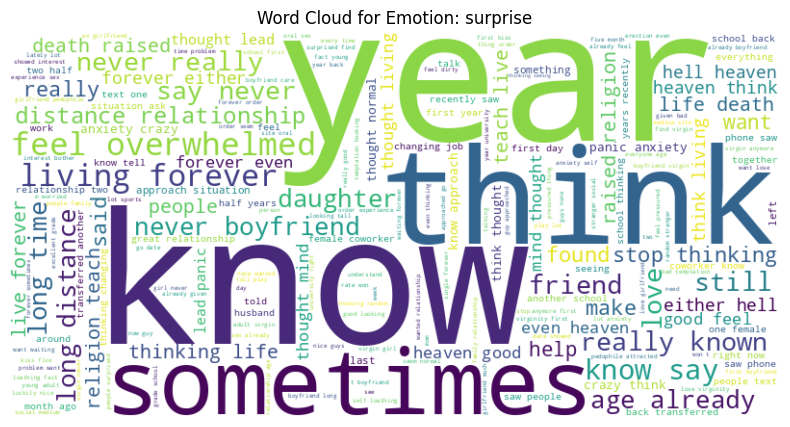

In [ ]:
# Group by 'max_emotion' and concatenate 'Context' within each group
emotion_texts = df.groupby('max_emotion')['Context'].apply(lambda x: ' '.join(x))

# Iterate through each emotion and create a word cloud
for emotion, text in emotion_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Emotion: {emotion}')
    plt.show()


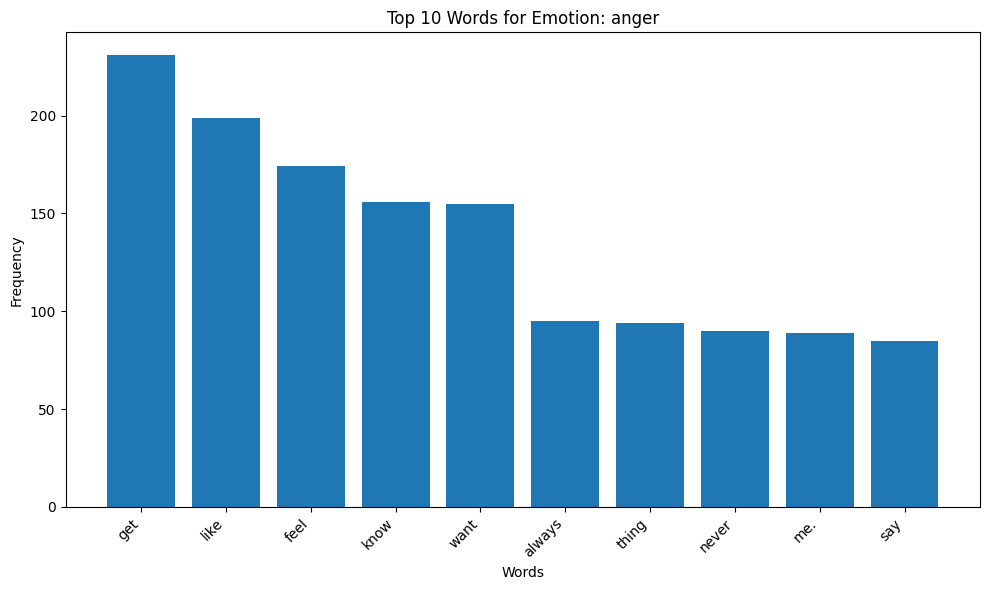

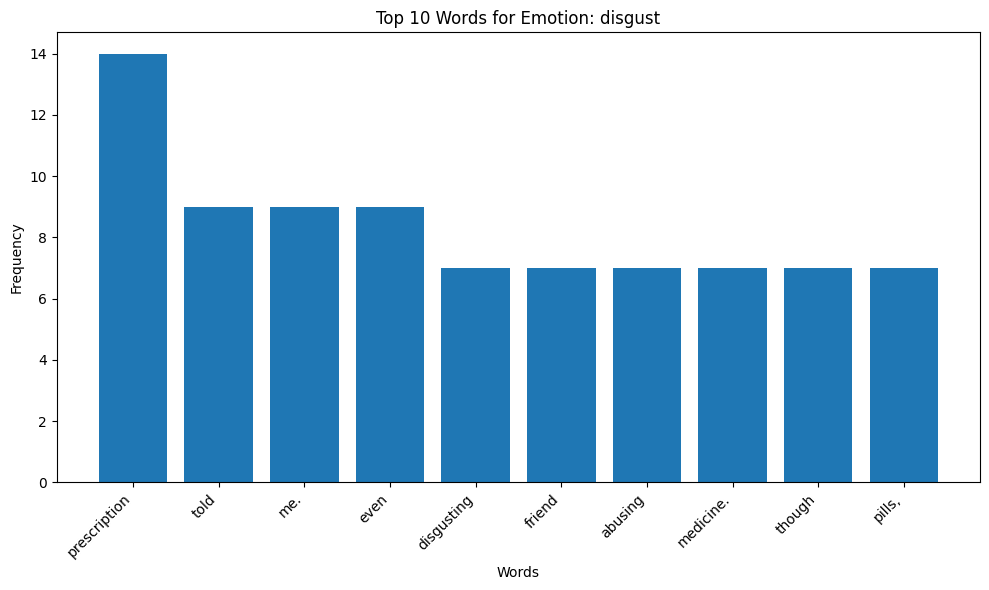

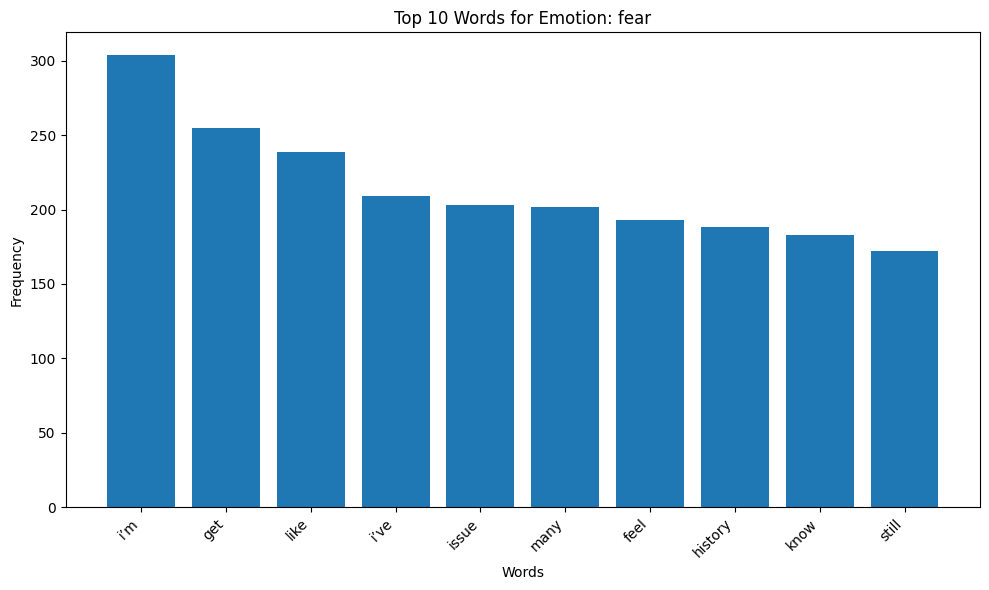

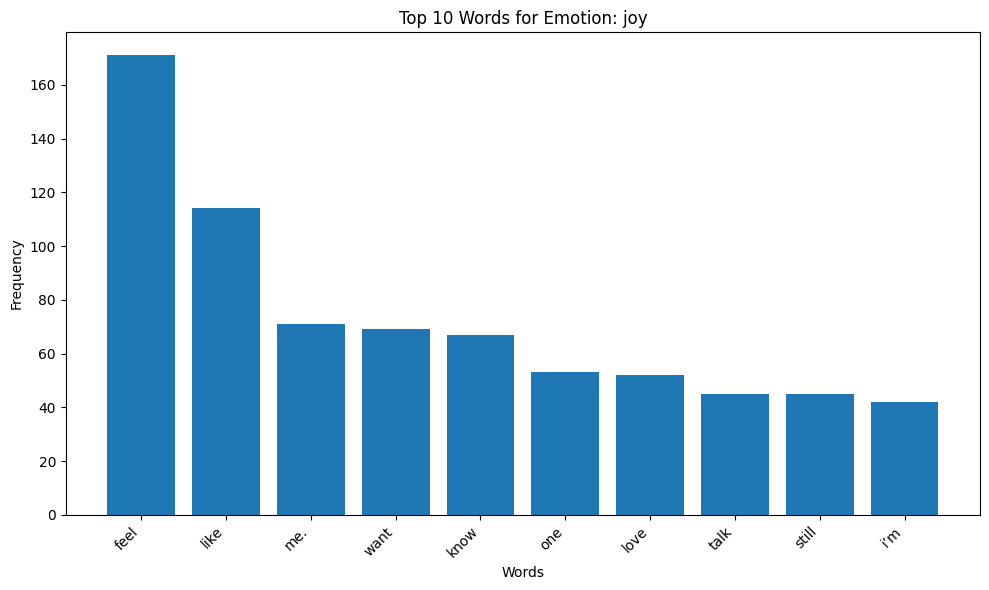

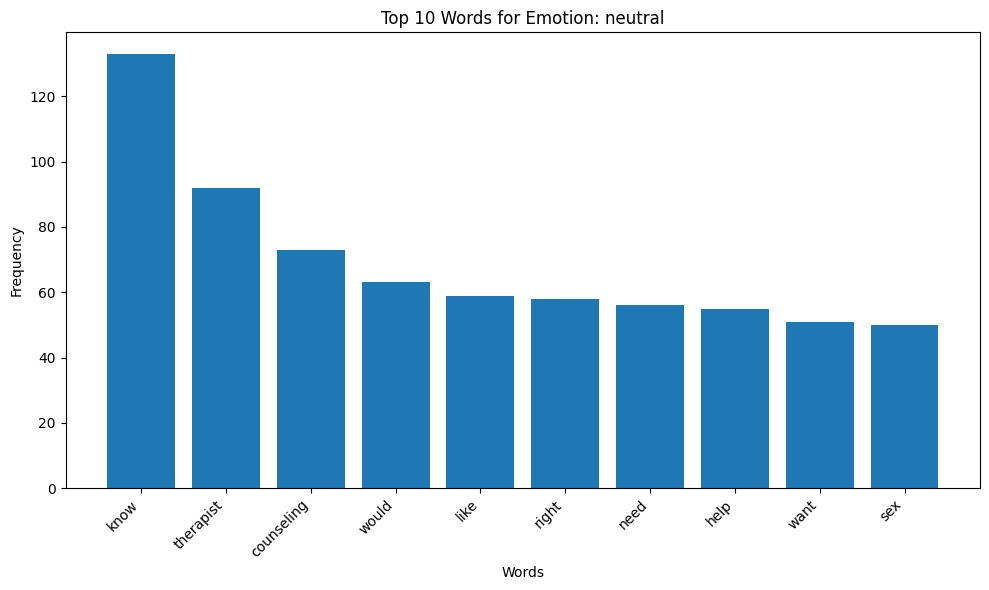

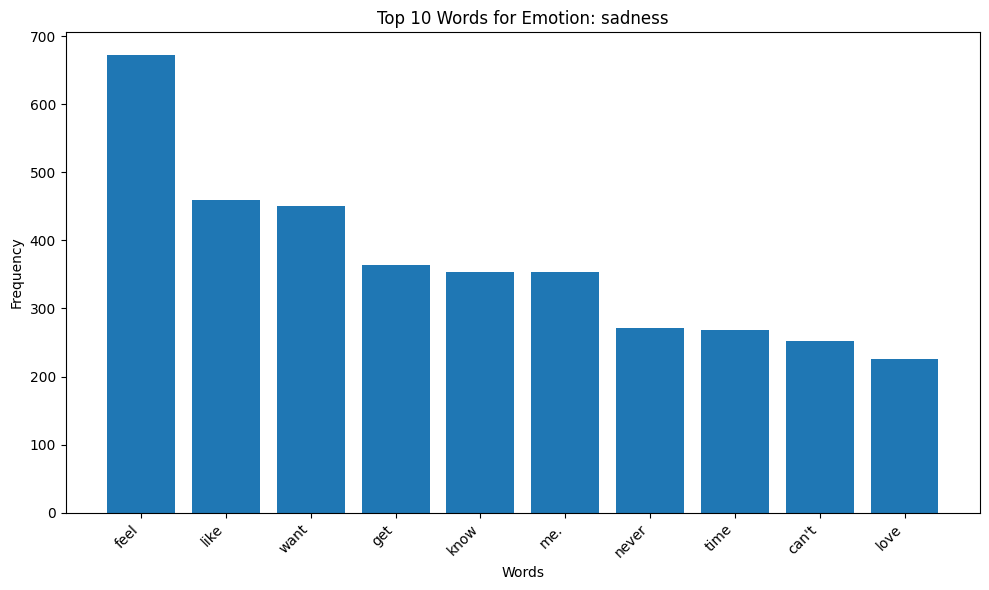

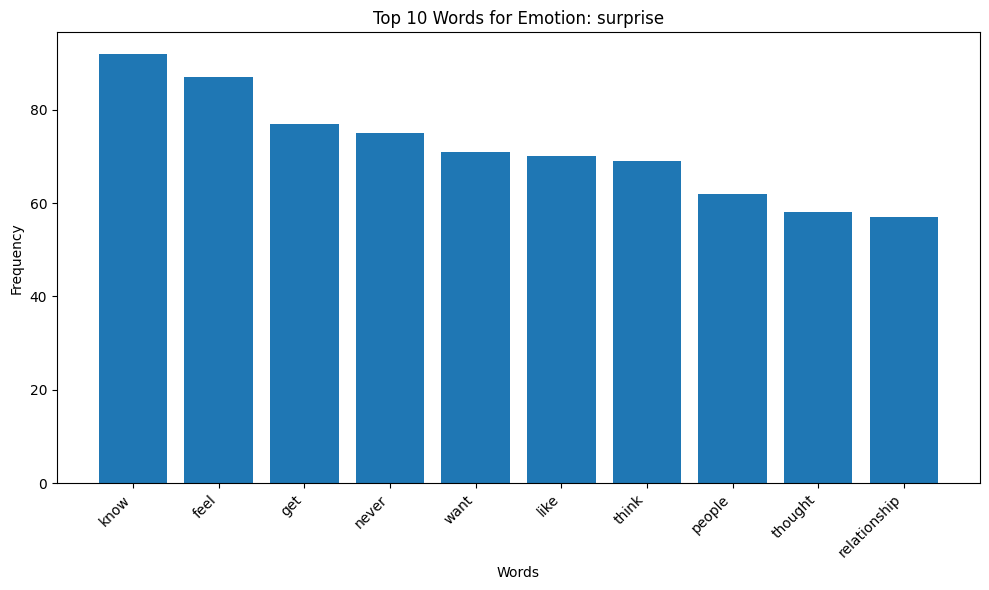

In [ ]:
# prompt: bar chart top 10 word ของแต่ละ emotion_texts

import matplotlib.pyplot as plt
from collections import Counter

# Assuming emotion_texts is defined as in the previous code
# ... (your existing code) ...

for emotion, text in emotion_texts.items():
    words = text.lower().split()
    word_counts = Counter(words)
    top_10_words = word_counts.most_common(10)

    # Extract words and counts for plotting
    labels, values = zip(*top_10_words)

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Top 10 Words for Emotion: {emotion}")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# กรองข้อความที่มีอารมณ์เดียวกัน
joy_texts = df[df['max_emotion'] == 'joy']['Context']

# Vectorize ข้อความ
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(joy_texts)

# ใช้ LDA สำหรับ Topic Modeling
lda = LatentDirichletAllocation(n_components=1, random_state=42)
lda.fit(X)

# แสดงคำที่เกี่ยวข้องกับหัวข้อ
words = vectorizer.get_feature_names_out()
topics = lda.components_

# แสดงคำที่สำคัญที่สุดในหัวข้อ
top_words = [words[i] for i in topics[0].argsort()[-10:]]
print("Top words in Joy Emotion:", top_words)

Top words in Joy Emotion: ['talk', 'life', 'girl', 'time', 'love', 'relationship', 'know', 'want', 'like', 'feel']


# LabelEncoder

In [ ]:
df["sentiment_label_Context"] = LabelEncoder().fit_transform(df["sentiment_label_Context"])
df["sentiment_label_Response"] = LabelEncoder().fit_transform(df["sentiment_label_Response"])

In [ ]:

y = df["sentiment_label_Response"] # target, dependent variable
X = df["Response"] # independent variable


# Count Vectors

In [ ]:
# Count Vectors:

vectorizer = CountVectorizer()
X_countvector = vectorizer.fit_transform(X)

In [ ]:
first5_words = vectorizer.get_feature_names_out()[:5]

word_frequencies = X_countvector.toarray()

for i, word in enumerate(first5_words):
    print(f"{word}: {word_frequencies[:, i]}")

00: [0 0 0 ... 0 0 0]
02: [0 0 0 ... 0 0 0]
06: [0 0 0 ... 0 0 0]
080241270x: [0 0 0 ... 0 0 0]
09: [0 0 0 ... 0 0 0]


# Sentiment Modeling

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       206
           1       0.95      0.98      0.96       953

    accuracy                           0.94      1159
   macro avg       0.93      0.86      0.89      1159
weighted avg       0.94      0.94      0.94      1159



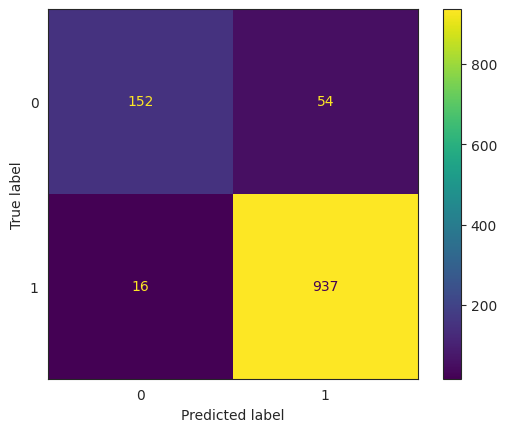

In [ ]:
# Count vector:

X_train, X_test, y_train, y_test = train_test_split(X_countvector , y, test_size=0.33, random_state=1)

lr = LogisticRegression()
sns.set_style('white')
pipe_lr = make_pipeline(lr)
pipe_lr.fit(X_train,y_train)
pred = pipe_lr.predict(X_test)
print(classification_report(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()
score_lr = accuracy_score(y_test,pred)


In [ ]:
# link to this work: "https://medium.com/@nrmnbabalik/nlp-natural-language-processing-ab11c4a731b6"